## Imports

In [2]:
'''
import pandas  as pd
import seaborn as sns
import numpy   as np
import matplotlib.pyplot as plt
from scipy.signal    import find_peaks
from scipy.integrate import simps, trapz
from scipy.optimize  import curve_fit
'''

from mainFile import *

mainFile e bibliotecas importados


## Lendo arquivo das waveforms
#### O arquivo original já foi parcialmente modificado em relação a linhas e colunas

In [3]:
'''Lendo arquivo das waveforms'''

waveform = pd.read_csv('../data/5555_eventos-edit.csv',     index_col = 0) # importa como waveform vs sample

## 3. ANÁLISE DE DADOS

## 3.1. Copia o data frame e seleciona a janela de busca

Cria uma cópia das waveforms para poder transladar o base line sem modificar os dados originais;

Define a janela onde procuraremos pelos valores do contorno do pulso

In [4]:
df = waveform.copy(deep = True)
df = df.iloc[ : , :df.shape[1] - 1 ]

VA_1 = 20 # VA_1 e VA_2 são variáveis arbitrárias para definir o majorante da largura dos pulsos
VA_2 = 70

convert_to_microsec = 1/250

## 3.2. Translação da base-line

É interessante transladar os pontos e fixar a base line no 0. Podemos fazer isso somando ~= -50 em cada um dos valores de toda a coleção de waveforms. Isso servirá para evitar problemas de 'height' no peak_finder()

Análise estatística do base-line:
No caso, tomaremos todos os dados antes do primeiro pulso de cada waveform e consideraremos o base-line como o mesmo para todos os waveforms

        Método:

Para encontrar a base line, selecionaremos a parte mais à esquerda, antes do pulso. Esse pedaço é definido como fora de um valor arbitrário em torno do primeiro pico da waveform, que acaba não sofrendo com a questão da base line. Definimos desse jeito porque a função para calcular o contorno do pulso, além de demorar para ser computada, sofre com as questões do peak_finder acabar encontrando apenas um elemento


In [5]:
height = 50 # esse parâmetro aqui é somente para efeito de encontrar os elementos da  base line a priori

baseLines = baseLine(df=df, height=height, VA_1=VA_1)

        Relocação do base-line:
Colocando o valor médio do base line como o parâmetro height do peak-finder, surpreendentemente temos um resultado que não incorre em erros na hora de achar os dois picos de cada waveform. No caso, ele acaba por achar dois picos (não mais nem menos) de maneira mais fácil e exata

In [6]:
'''
Alterando os valores e recolocando na base line ~= 0
'''

df.iloc[ :  , : df.shape[1] ] -= baseLines.mean() 
# soma ~= -50 em todo o df, exceto pela última coluna 'time'
df.head(2)

height = baseLines.mean()

In [7]:
# %%time
# '''
# Filtrando os dados de acordo com o valor do tempo de vida do muon
# '''
# df_filt_delta_t = filtra_delta_t(df=df, convert_to_microsec=convert_to_microsec, time_in_ADCch=5, height=height)

## Curve fit exponencial da diferença de tempo

In [8]:
# %%time
curve_fit_exponencial(df=df , height=height, convert_to_microsec=convert_to_microsec)


(          valor  incerteza
 A    707.652008   2.343699
 tau    2.143909   0.015956
 C      3.953870   1.117539,
 <Figure size 1600x1200 with 1 Axes>,
 array([0.23583333, 0.4995    , 0.76316667, 1.02683333, 1.2905    ,
        1.55416667, 1.81783333, 2.0815    , 2.34516667, 2.60883333,
        2.8725    , 3.13616667, 3.39983333, 3.6635    , 3.92716667,
        4.19083333, 4.4545    , 4.71816667, 4.98183333, 5.2455    ,
        5.50916667, 5.77283333, 6.0365    , 6.30016667, 6.56383333,
        6.8275    , 7.09116667, 7.35483333, 7.6185    , 7.88216667,
        8.14583333, 8.4095    , 8.67316667, 8.93683333, 9.2005    ,
        9.46416667]),
 array([645, 527, 536, 431, 437, 327, 295, 284, 203, 191, 186, 189, 149,
        169, 122, 102,  87,  82,  71,  51,  55,  61,  53,  55,  30,  33,
         20,  23,  17,  24,  23,  13,   7,  16,  20,  21], dtype=int64))

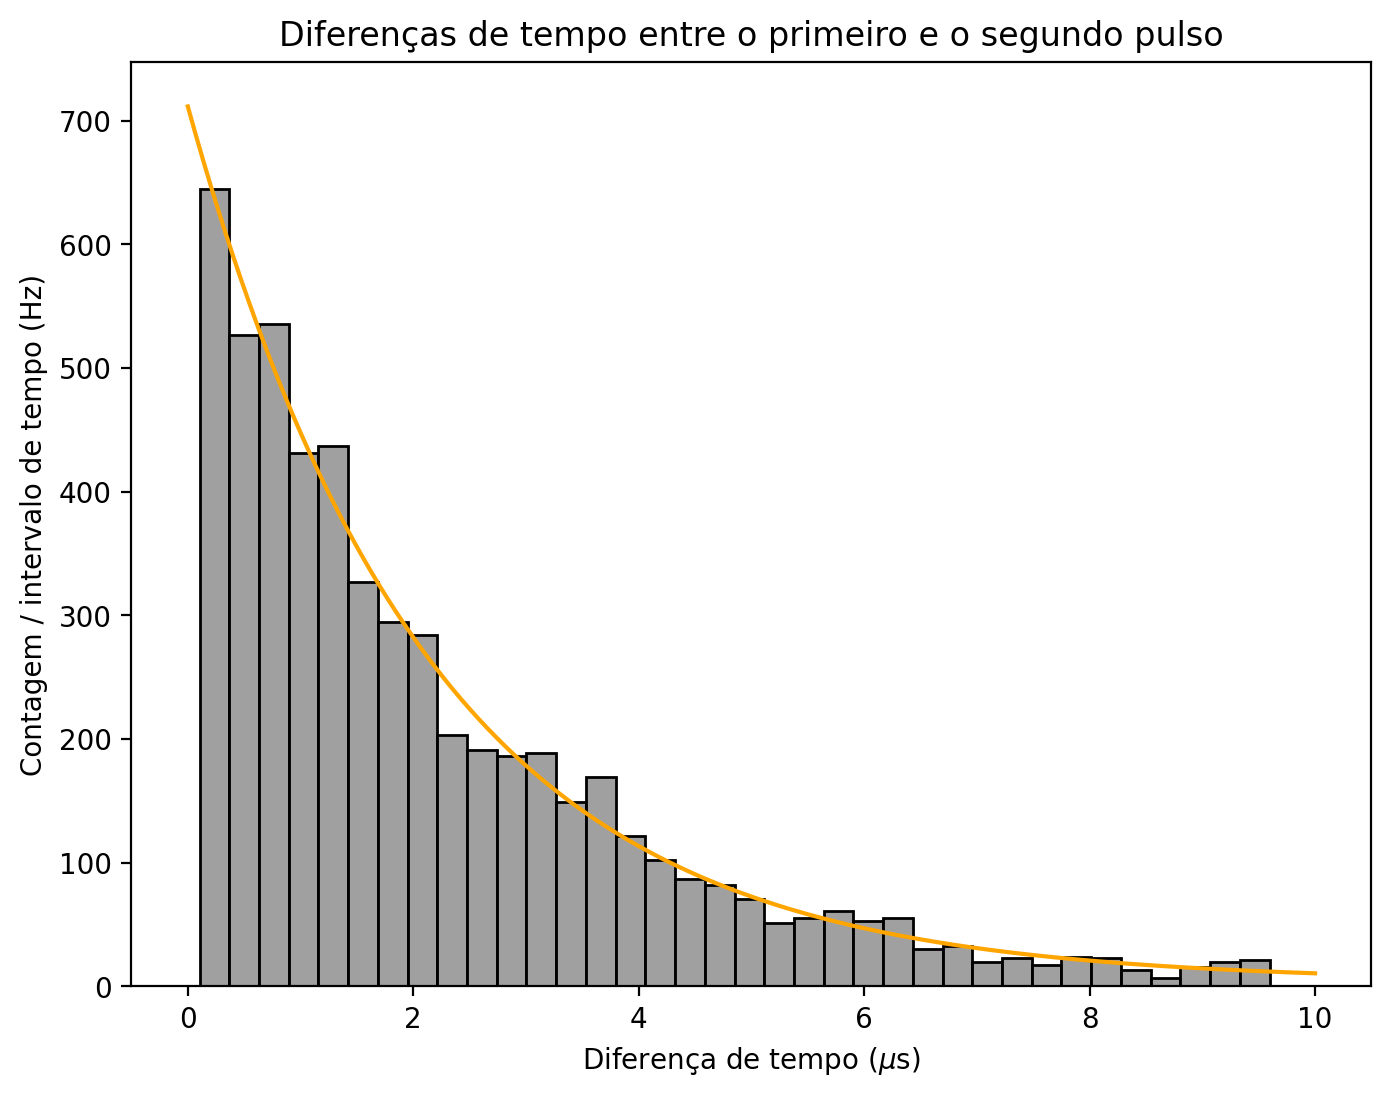

In [9]:
plt.show()

## 4.1. Loop para construção e check do peak_finder
Esse loop cria e checa se existem erros na obtenção dos picos através da função peak-finder, quando peaks != 2

In [10]:
peaks_xy_0   ,   peaks_xy_1    =    peaks_divididos_01(df=df, height = baseLines.mean())
peaks_xy_0.index = peaks_xy_0.index // 2
peaks_xy_1.index = peaks_xy_1.index // 2

In [11]:
peaks_xy_0

,x,y
0,94,-179.27679
1,94,-179.27679
2,94,-179.27679
3,94,-179.27679
4,94,-179.27679
...,...,...
5550,93,-56.27679
5551,93,-56.27679
5552,93,-56.27679
5553,93,-56.27679


# 5. Plot espectro de amplitude

## 5.1. Plot do espectro de amplitude do primeiro pulso 

In [12]:
# sns.histplot( -1*peaks_xy_0['y'].round() )
# plt.title('Espectro de amplitude do muon')
# plt.xlabel('Máximo do pulso')
# plt.savefig("images/espectro_amplitude-pulso_0.png", dpi = 150)

In [13]:
#sns_plot = sns.histplot( -1*peaks_xy_0.query('y > y.min()')['y'] )
#plt.title('Espectro de amplitude do muon [sem saturação]')
#plt.savefig("images/espectro_amplitude_0_ZOOM.png", dpi = 150)

## 5.3. Plot do espectro de amplitude do segundo pulso 

In [14]:
# sns.histplot( -1*peaks_xy_1['y'].round() )
# plt.title('Espectro de amplitude do eletron')
# plt.savefig("images/espectro_amplitude_1.png", dpi = 150)

In [15]:
#sns.histplot( -1*peaks_xy_1.query('y > y.min()')['y'] )
#plt.title('Espectro de amplitude do eletron [sem saturação]')
#plt.savefig("images/espectro_amplitude_1_ZOOM.png", dpi = 150)

# 6. Plot dos espectro de carga

## 6.2. Integração do pulso 

Integramos o pulso para obter a carga gerada com ele. Utilizamos a integração pelo método de Simpson.

In [16]:
_ = contorno_limite_arbitrario_picos(
    df=df, peaks_01=(peaks_xy_0,peaks_xy_1), VA_1=VA_1, VA_2=VA_2, height=height
                                    )


Foram detectados 21 problemas na questão do tamanho da janela do contorno;
Os problemas estão em [6, 7, 8, 9, 213, 608, 1821, 2277, 2509, 3310, 3612, 3613, 3614, 3615, 3616, 4301, 4397, 4398, 4399, 4572, 5427];
Preenchidos com valores Nan



In [17]:
_[0]

,0,1,2,3,4,5,6,7,8,9,...,5545,5546,5547,5548,5549,5550,5551,5552,5553,5554
0,1.72321,1.72321,1.72321,0.72321,0.72321,0.72321,-1.27679,-1.27679,-1.27679,-1.27679,...,-0.27679,-0.27679,-0.27679,-0.27679,-1.27679,-2.27679,-2.27679,-2.27679,-2.27679,-2.27679
1,2.72321,2.72321,2.72321,1.72321,1.72321,1.72321,1.72321,1.72321,1.72321,1.72321,...,1.72321,1.72321,-0.27679,-0.27679,-1.27679,0.72321,0.72321,0.72321,0.72321,0.72321
2,2.72321,2.72321,2.72321,1.72321,0.72321,0.72321,0.72321,0.72321,0.72321,0.72321,...,-0.27679,-0.27679,-1.27679,-1.27679,0.72321,4.72321,4.72321,4.72321,4.72321,4.72321
3,0.72321,0.72321,0.72321,-0.27679,0.72321,0.72321,1.72321,1.72321,1.72321,1.72321,...,1.72321,1.72321,-2.27679,-2.27679,1.72321,1.72321,1.72321,1.72321,1.72321,1.72321
4,2.72321,2.72321,2.72321,0.72321,1.72321,1.72321,0.72321,0.72321,0.72321,0.72321,...,-1.27679,-1.27679,-1.27679,-1.27679,-0.27679,-1.27679,-1.27679,-1.27679,-1.27679,-1.27679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2.72321,2.72321,2.72321,0.72321,0.72321,0.72321,1.72321,1.72321,1.72321,1.72321,...,1.72321,1.72321,1.72321,1.72321,-0.27679,0.72321,0.72321,0.72321,0.72321,0.72321
87,2.72321,2.72321,2.72321,2.72321,0.72321,0.72321,1.72321,1.72321,1.72321,1.72321,...,-2.27679,-2.27679,-2.27679,-2.27679,-2.27679,-0.27679,-0.27679,-0.27679,-0.27679,-0.27679
88,1.72321,1.72321,1.72321,0.72321,0.72321,0.72321,1.72321,1.72321,1.72321,1.72321,...,-2.27679,-2.27679,-2.27679,-2.27679,-0.27679,-1.27679,-1.27679,-1.27679,-1.27679,-1.27679
89,0.72321,0.72321,0.72321,-0.27679,0.72321,0.72321,0.72321,0.72321,0.72321,0.72321,...,-1.27679,-1.27679,-1.27679,-1.27679,-2.27679,-0.27679,-0.27679,-0.27679,-0.27679,-0.27679


In [18]:
#plt.plot(df.event_6.iloc[2200:2500])
#plt.title('exemplo de problema com os picos')

In [19]:
integrais_0 = integral_simples_dataframe(_[0], dx=1)
integrais_1 = integral_simples_dataframe(_[1], dx=1)

In [37]:
integrais_1

0      -496.187859
1      -496.187859
2      -496.187859
3      -757.187859
4      -157.187859
           ...    
5550   -875.187859
5551   -875.187859
5552   -875.187859
5553   -875.187859
5554   -875.187859
Length: 5555, dtype: float64

In [21]:
# sns.histplot(-1*integrais_0)
# plt.title("Espectro de carga - pulso do muon (0)")
# plt.xlabel('Carga (unidades)')
# plt.savefig("images/espectro_carga-pulso_0.png", dpi = 150)

In [22]:
# sns.histplot(-1*integrais_1)
# plt.title("Espectro de carga - pulso do eletron (1)")
# plt.xlabel('Carga (unidades)')
# plt.savefig("images/espectro_carga-pulso_1.png", dpi = 150)

In [23]:
fig = plt.figure(dpi=200, figsize=(10,8))
fig.suptitle('Espectros de amplitude e carga', fontsize=15)

ax1 = plt.subplot(221)
sns.histplot( -1*peaks_xy_0['y'], color='black' )
plt.xlabel('Pico do pulso (unidades)')
plt.title(r"Espectro de amplitude - $\mu$")

ax2 = plt.subplot(222, sharex=ax1, sharey=ax1)
sns.histplot( -1*peaks_xy_1['y'] , color='gray')
plt.xlabel('Pico do pulso (unidades)')
plt.title(r"Espectro de amplitude - $e^{-}$")

ax3 = plt.subplot(223)
sns.histplot(-1*integrais_0, color='black')
plt.xlabel('Carga (unidades)')
plt.title(r"Espectro de carga - $\mu$")

ax4 = plt.subplot(224, sharex=ax3, sharey=ax3)
sns.histplot(-1*integrais_1, color='gray')
plt.xlabel('Carga (unidades)')
plt.title(r"Espectro de carga - $e^{-}$")

fig.tight_layout()

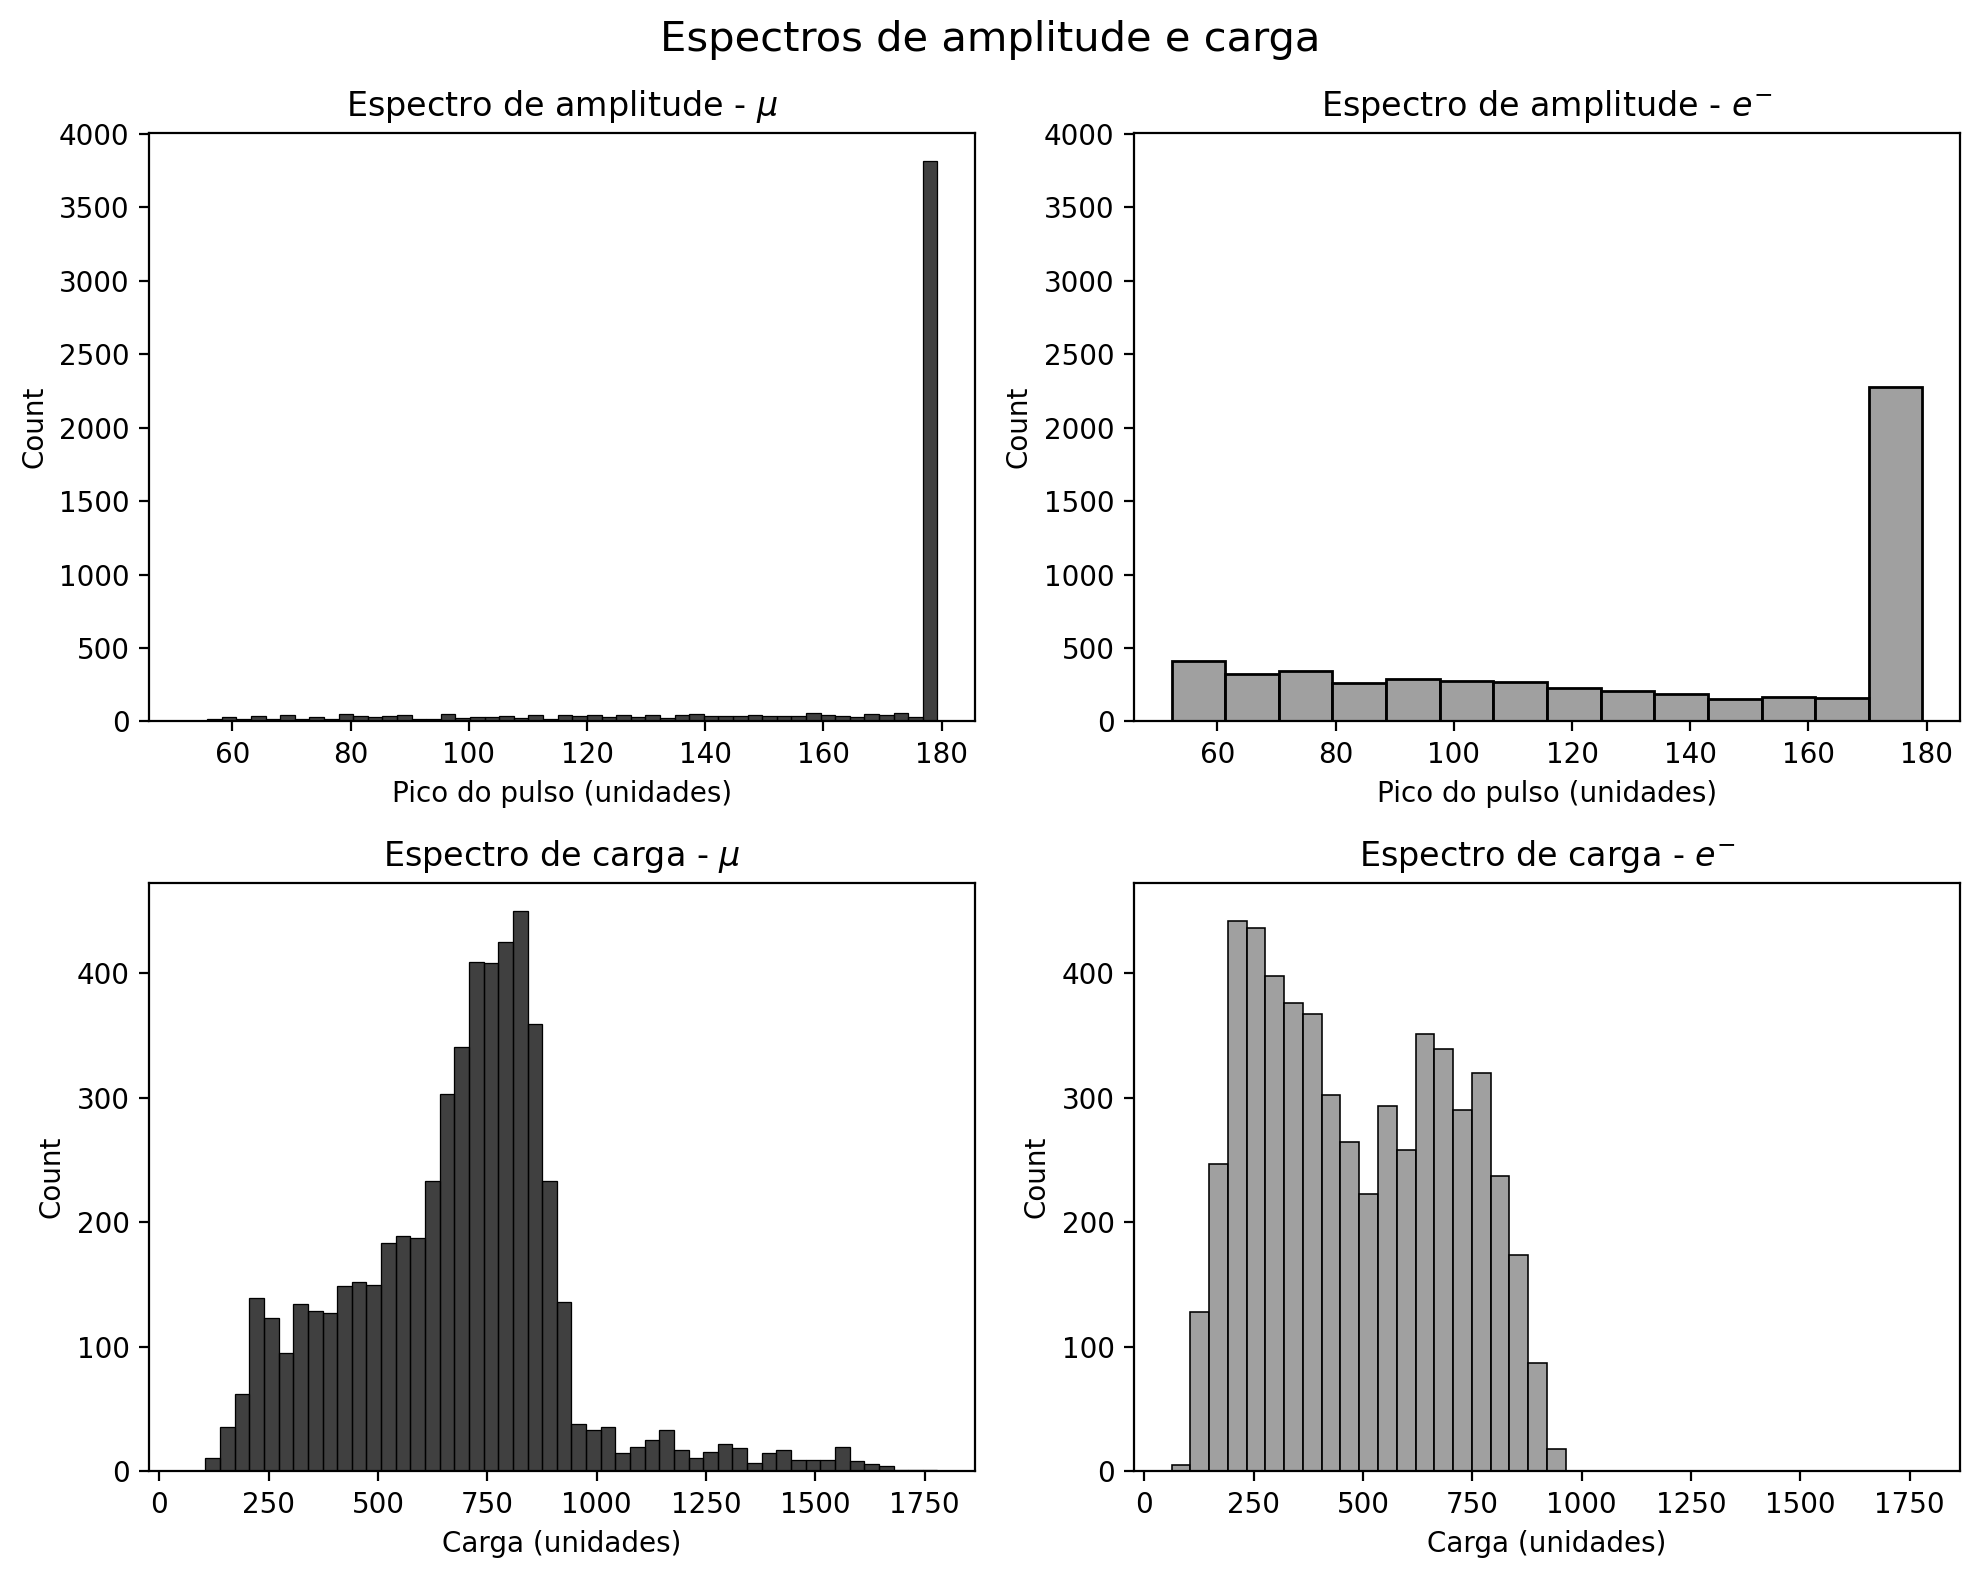

In [24]:
plt.show()

## Filtrando as saturações

In [25]:
# plt.plot(df.event_4, color = 'green', label = 'event_4')
# plt.plot(df.event_6, color = 'black', label = 'event_6')
# plt.legend()
# plt.title('Saturações em apenas um pico')

In [26]:
#%%time
#df_filt_sat_tot = filtra_saturacao_total( df=df , height=height , VA_1=VA_1 , VA_2=VA_2 )

In [27]:
df_filt_parcial = filtra_saturacao_parcial(df=df, height=height, VA_1=VA_1, VA_2=VA_2)
peaks_xy_0_filt   ,   peaks_xy_1_filt    =    df_filt_parcial
peaks_xy_0_filt.index = peaks_xy_0_filt.index // 2
peaks_xy_1_filt.index = peaks_xy_1_filt.index // 2

c:\Users\jhapr\Documents\GitHub\mudecay\MuonDecay\.old\analysis\mainFile.py:427: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return( np.array([ filt_0, filt_1 ]) )


In [28]:
_ = contorno_limite_arbitrario_picos(df=df, peaks_01=df_filt_parcial, VA_1=VA_1, VA_2=VA_2, height=height)


Foram detectados 13 problemas na questão do tamanho da janela do contorno;
Os problemas estão em [213, 608, 3310, 3612, 3613, 3614, 3615, 3616, 4301, 4397, 4398, 4399, 4572];
Preenchidos com valores Nan



In [29]:
integrais_0_filt = integral_simples_dataframe(_[0], dx=1)
integrais_1_filt = integral_simples_dataframe(_[1], dx=1)

In [30]:
# sns.histplot( -1*peaks_xy_0_filt['y'].round() )
# plt.title('Espectro de amplitude do muon Filtrado')
# plt.xlabel('Máximo do pulso')
# plt.savefig("images/espectro_amplitude-pulso_0_filtrado.png", dpi = 150)

In [31]:
# sns.histplot( -1*peaks_xy_1_filt['y'].round() )
# plt.title('Espectro de amplitude do eletron Filtrado')
# plt.savefig("images/espectro_amplitude_1_filtrado.png", dpi = 150)

In [32]:
# sns.histplot(-1*integrais_0_filt)
# plt.title("Espectro de carga - pulso do muon (0) Filtrado")
# plt.xlabel('Carga (unidades)')
# plt.savefig("images/espectro_carga-pulso_0_filtrado.png", dpi = 150)

In [33]:
# sns.histplot(-1*integrais_1_filt)
# plt.title("Espectro de carga - pulso do eletron (1) Filtrado")
# plt.xlabel('Carga (unidades)')
# plt.savefig("images/espectro_carga-pulso_1_filtrado.png", dpi = 150)

In [34]:
fig = plt.figure(dpi=200, figsize=(10,8))
fig.suptitle('Espectros de amplitude e carga filtrados pela saturação', fontsize=15)

ax1 = plt.subplot(221)
sns.histplot( -1*peaks_xy_0_filt['y'], color='black' )
plt.xlabel('Pico do pulso (unidades)')
plt.title(r"Espectro de amplitude - $\mu$")

ax2 = plt.subplot(222, sharex=ax1, sharey=ax1)
sns.histplot( -1*peaks_xy_1_filt['y'] , color='gray')
plt.xlabel('Pico do pulso (unidades)')
plt.title(r"Espectro de amplitude - $e^{-}$")

ax3 = plt.subplot(223)
sns.histplot(-1*integrais_0_filt, color='black')
plt.xlabel('Carga (unidades)')
plt.title(r"Espectro de carga - $\mu$")

ax4 = plt.subplot(224, sharex=ax3, sharey=ax3)
sns.histplot(-1*integrais_1_filt, color='gray')
plt.xlabel('Carga (unidades)')
plt.title(r"Espectro de carga - $e^{-}$")

fig.tight_layout()


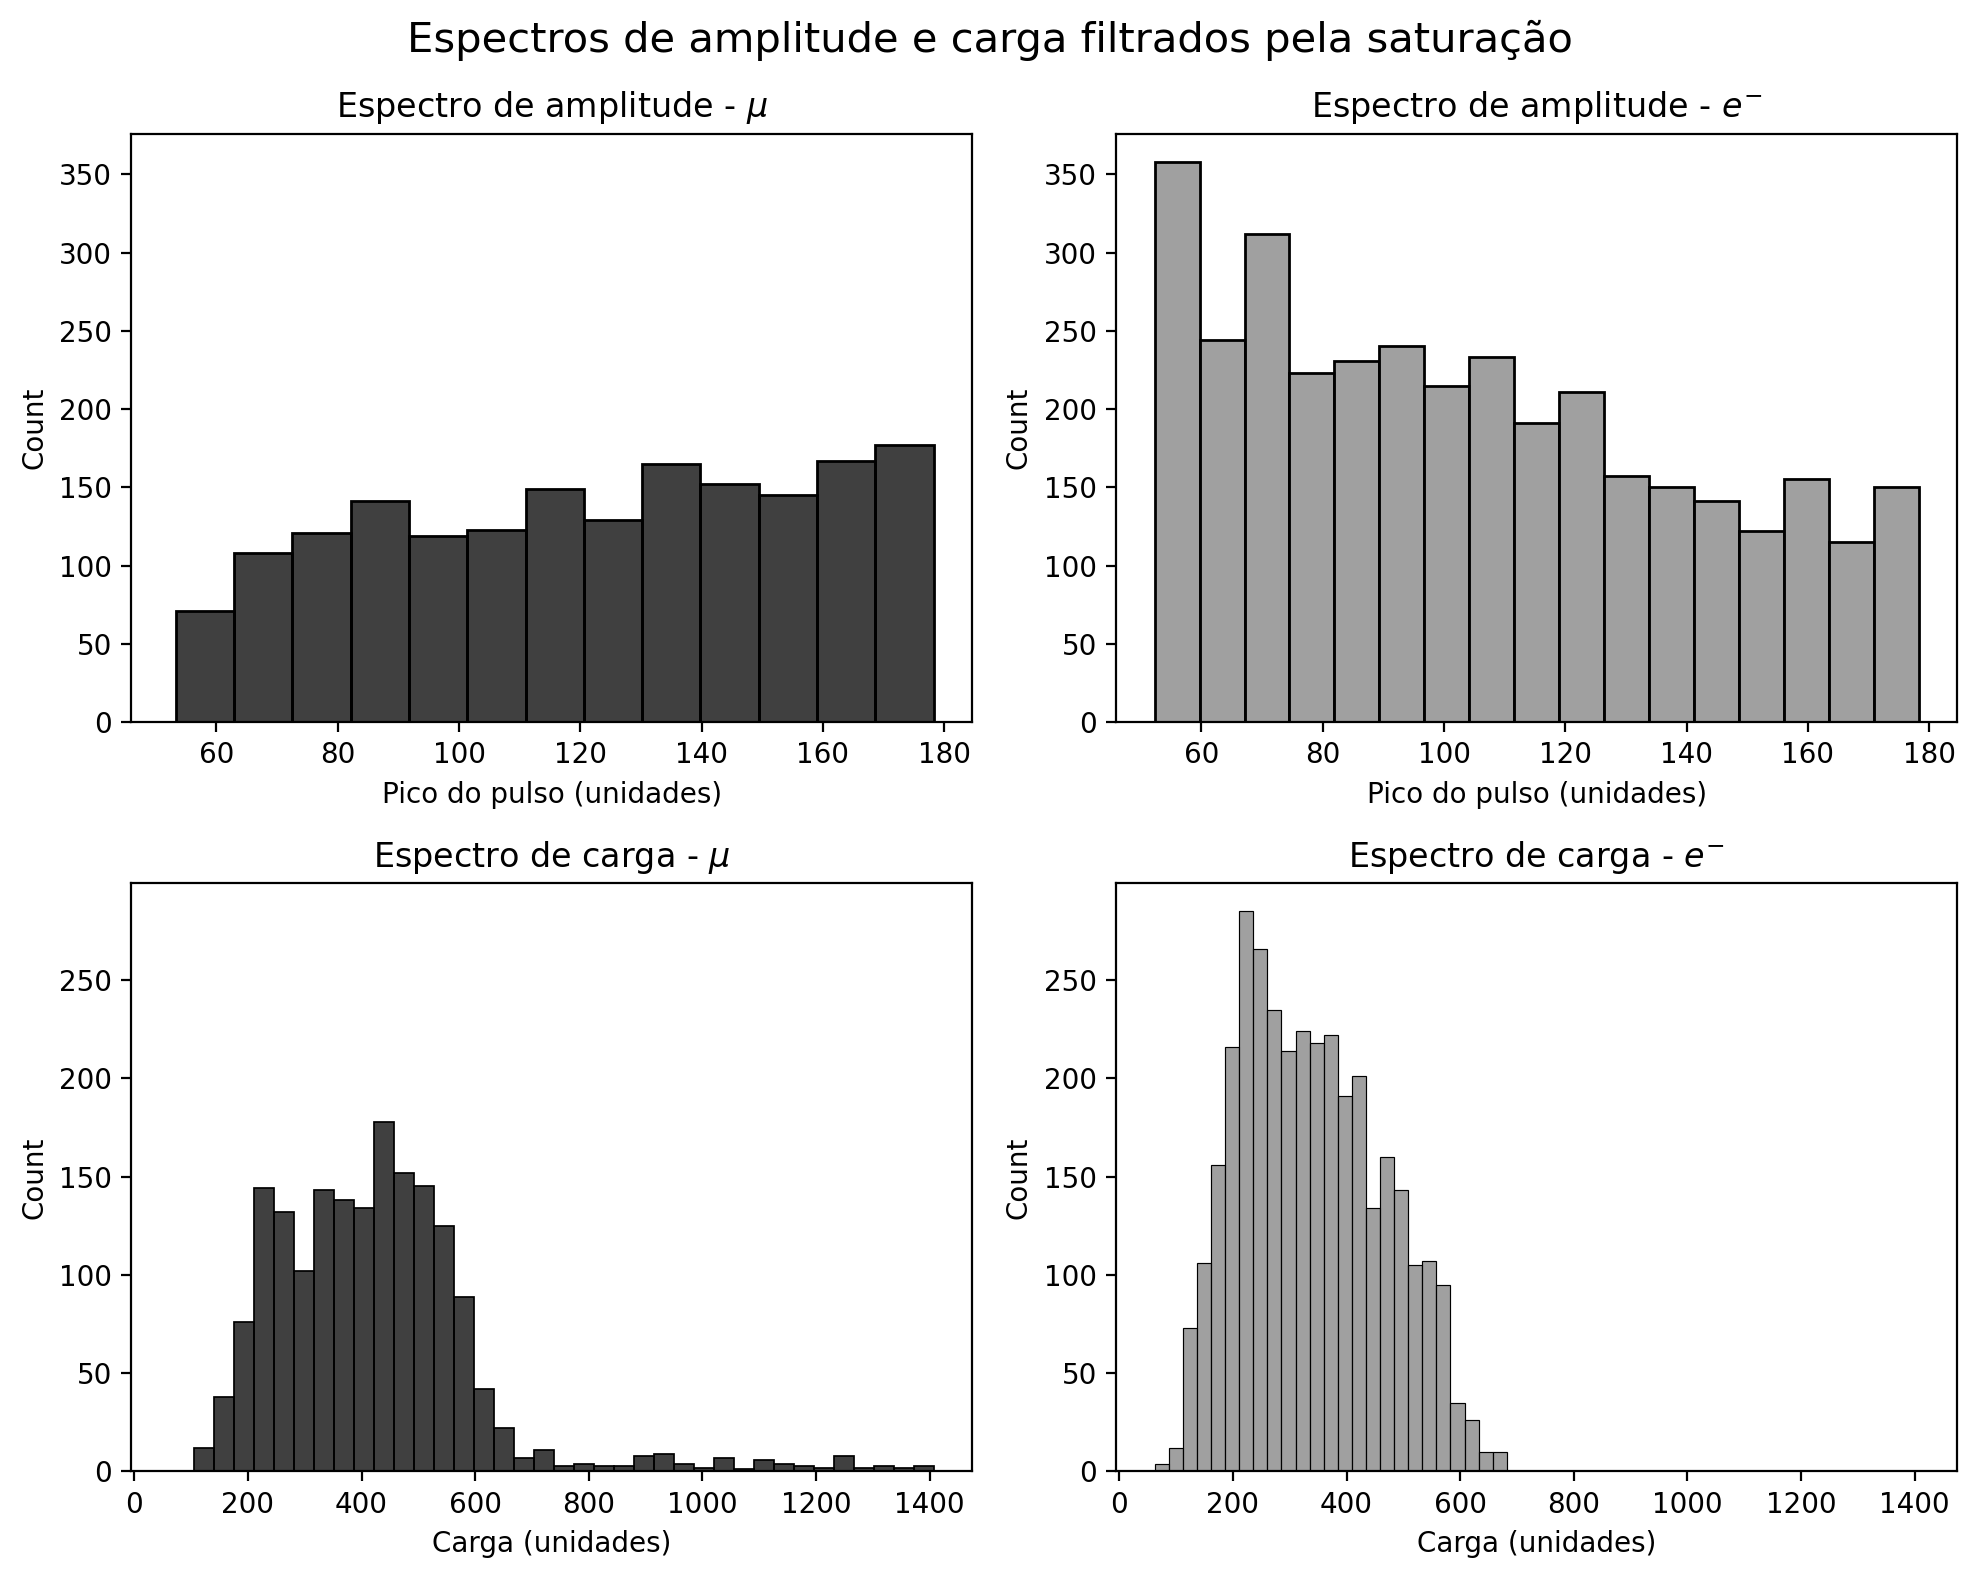

In [35]:
plt.show()

    Como pedido, um DataFrame que une os valores dos delta_t, picos e integrais


In [36]:
# '''
# Como pedido, um DataFrame que une os valores dos delta_t, picos e integrais
# '''

# _ = pd.DataFrame(   peaks_em_x( df=df, height=height),  columns = ['peak_0', 'peak_1']   )   
# delta_x = (   _['peak_1']  -  _['peak_0']   )
# delta_x.name = 'delta_x'

# _ = pd.DataFrame( [delta_x , -1*integrais_0 , -1*integrais_1] ).T

# df_bruto = pd.concat( 
#     (_ , peaks_xy_0.reset_index().iloc[: , 1:], peaks_xy_1.reset_index().iloc[: , 1:]) , axis=1
#                     )
# df_bruto.columns = ['delta_x' , 'integrais_muon' , 'integrais_eletron', 'x_pico_muon' , 'y_pico_muon', 'x_pico_eletron' , 'y_pico_eletron']

#df_bruto.to_csv('data/df_resultados_brutos.csv')